In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ads = pd.read_csv('../DataSet/ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('../DataSet/currency.csv', index_col=['Time'], parse_dates=['Time'])

In [4]:
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [5]:
currency.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


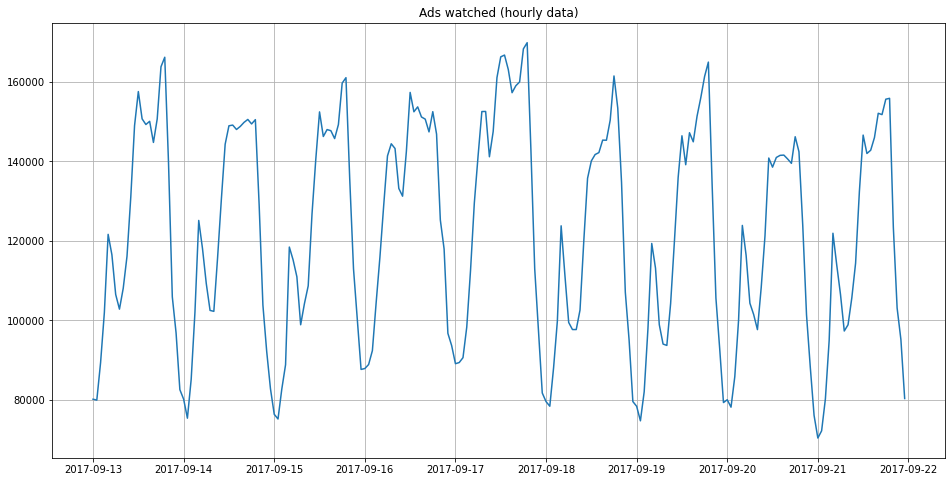

In [6]:
plt.figure(figsize=(16,8))
plt.plot(ads.Ads)
plt.grid(True)
plt.title('Ads watched (hourly data)')
plt.show()

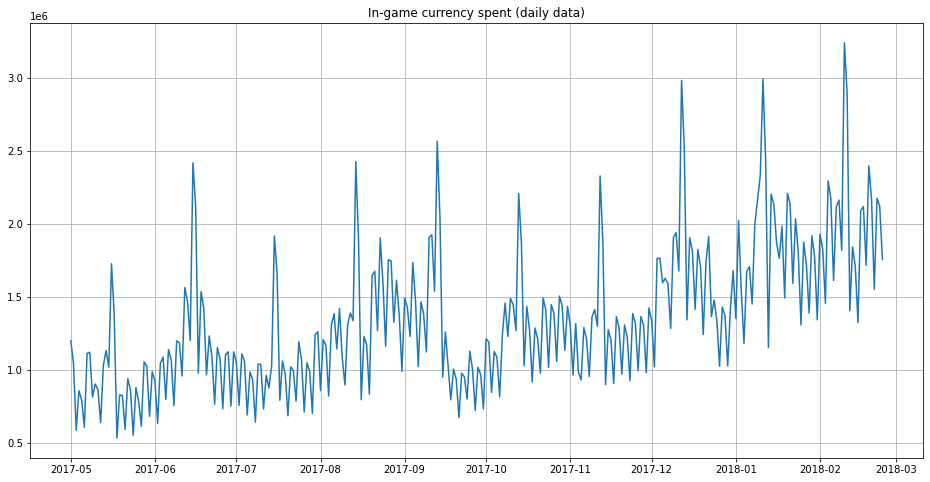

In [7]:
plt.figure(figsize=(16,8))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.grid(True)
plt.title('In-game currency spent (daily data)')
plt.show()

## Decomposition of a time series model

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

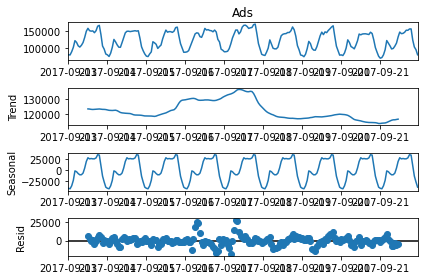

In [27]:
result1 = seasonal_decompose(ads.Ads, model='additive')
result1.plot();

In [20]:
result1

In [23]:
result1.trend.head(20)

Time
2017-09-13 00:00:00              NaN
2017-09-13 01:00:00              NaN
2017-09-13 02:00:00              NaN
2017-09-13 03:00:00              NaN
2017-09-13 04:00:00              NaN
2017-09-13 05:00:00              NaN
2017-09-13 06:00:00              NaN
2017-09-13 07:00:00              NaN
2017-09-13 08:00:00              NaN
2017-09-13 09:00:00              NaN
2017-09-13 10:00:00              NaN
2017-09-13 11:00:00              NaN
2017-09-13 12:00:00    123368.541667
2017-09-13 13:00:00    123273.958333
2017-09-13 14:00:00    123091.250000
2017-09-13 15:00:00    123006.458333
2017-09-13 16:00:00    123082.604167
2017-09-13 17:00:00    123188.020833
2017-09-13 18:00:00    123277.291667
2017-09-13 19:00:00    123327.500000
Name: trend, dtype: float64

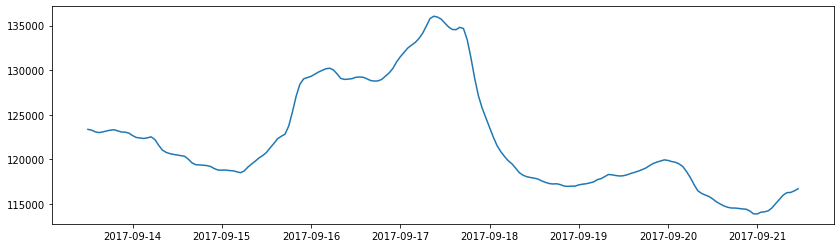

In [16]:
plt.figure(figsize=(14,4))
plt.plot(result1.trend)
plt.show()

In [28]:
result1.seasonal.head(40)

Time
2017-09-13 00:00:00   -41858.409288
2017-09-13 01:00:00   -43002.159288
2017-09-13 02:00:00   -36118.825955
2017-09-13 03:00:00   -23636.325955
2017-09-13 04:00:00    -1811.690538
2017-09-13 05:00:00    -3661.794705
2017-09-13 06:00:00    -7931.495226
2017-09-13 07:00:00   -10800.766059
2017-09-13 08:00:00   -10563.708767
2017-09-13 09:00:00    -6833.135851
2017-09-13 10:00:00     4649.051649
2017-09-13 11:00:00    19909.103733
2017-09-13 12:00:00    28443.726128
2017-09-13 13:00:00    25918.713108
2017-09-13 14:00:00    26699.507378
2017-09-13 15:00:00    25970.223524
2017-09-13 16:00:00    26030.809462
2017-09-13 17:00:00    28115.405816
2017-09-13 18:00:00    35495.731337
2017-09-13 19:00:00    34568.817274
2017-09-13 20:00:00    10783.973524
2017-09-13 21:00:00   -13831.638455
2017-09-13 22:00:00   -27295.336372
2017-09-13 23:00:00   -39239.776476
2017-09-14 00:00:00   -41858.409288
2017-09-14 01:00:00   -43002.159288
2017-09-14 02:00:00   -36118.825955
2017-09-14 03:00:00   -

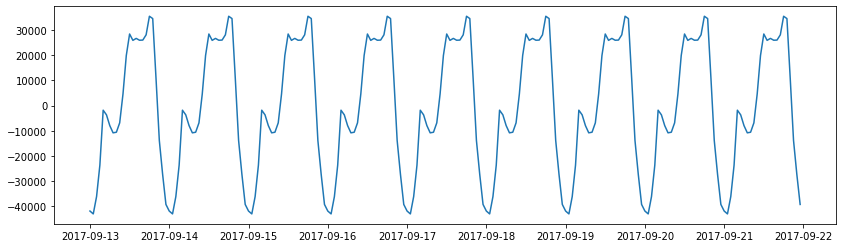

In [18]:
plt.figure(figsize=(14,4))
plt.plot(result1.seasonal)
plt.show()

In [26]:
result1.resid.head(20)

Time
2017-09-13 00:00:00            NaN
2017-09-13 01:00:00            NaN
2017-09-13 02:00:00            NaN
2017-09-13 03:00:00            NaN
2017-09-13 04:00:00            NaN
2017-09-13 05:00:00            NaN
2017-09-13 06:00:00            NaN
2017-09-13 07:00:00            NaN
2017-09-13 08:00:00            NaN
2017-09-13 09:00:00            NaN
2017-09-13 10:00:00            NaN
2017-09-13 11:00:00            NaN
2017-09-13 12:00:00    5777.732205
2017-09-13 13:00:00    1522.328559
2017-09-13 14:00:00    -495.757378
2017-09-13 15:00:00    1123.318142
2017-09-13 16:00:00   -4333.413628
2017-09-13 17:00:00    -613.426649
2017-09-13 18:00:00    5066.976997
2017-09-13 19:00:00    8338.682726
Name: resid, dtype: float64

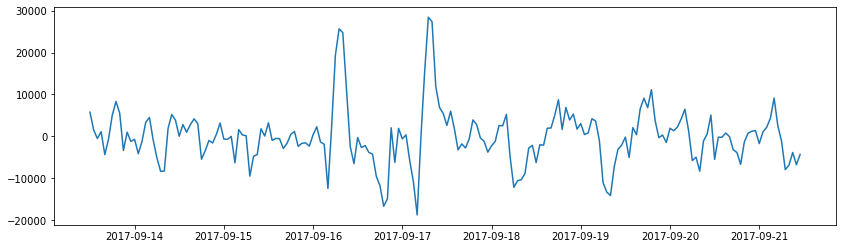

In [19]:
plt.figure(figsize=(14,4))
plt.plot(result1.resid)
plt.show()

In [30]:
result = result1.trend + result1.seasonal + result1.resid
result.head(20)

Time
2017-09-13 00:00:00         NaN
2017-09-13 01:00:00         NaN
2017-09-13 02:00:00         NaN
2017-09-13 03:00:00         NaN
2017-09-13 04:00:00         NaN
2017-09-13 05:00:00         NaN
2017-09-13 06:00:00         NaN
2017-09-13 07:00:00         NaN
2017-09-13 08:00:00         NaN
2017-09-13 09:00:00         NaN
2017-09-13 10:00:00         NaN
2017-09-13 11:00:00         NaN
2017-09-13 12:00:00    157590.0
2017-09-13 13:00:00    150715.0
2017-09-13 14:00:00    149295.0
2017-09-13 15:00:00    150100.0
2017-09-13 16:00:00    144780.0
2017-09-13 17:00:00    150690.0
2017-09-13 18:00:00    163840.0
2017-09-13 19:00:00    166235.0
dtype: float64

In [31]:
ads.head(20)

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
2017-09-13 05:00:00,116475
2017-09-13 06:00:00,106495
2017-09-13 07:00:00,102795
2017-09-13 08:00:00,108055


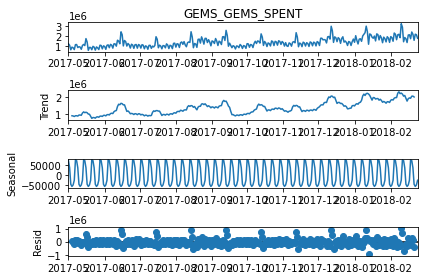

In [21]:
result2 = seasonal_decompose(currency.GEMS_GEMS_SPENT, model='additive')
result2.plot();

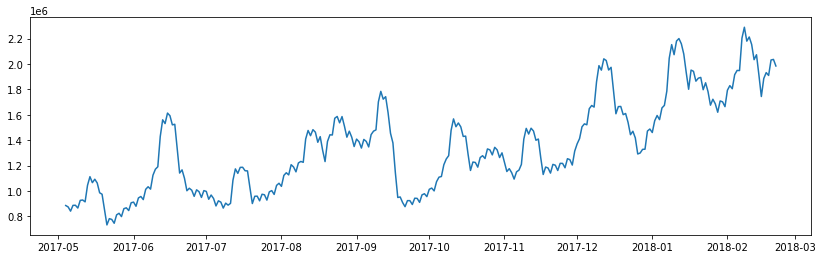

In [33]:
plt.figure(figsize=(14,4))
plt.plot(result2.trend)
plt.show()

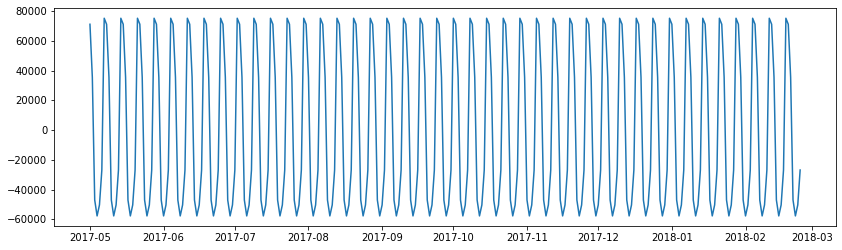

In [34]:
plt.figure(figsize=(14,4))
plt.plot(result2.seasonal)
plt.show()

In [36]:
result2.seasonal.head(20)

Time
2017-05-01    71172.486880
2017-05-02    35523.939261
2017-05-03   -47007.002915
2017-05-04   -57718.744412
2017-05-05   -50343.744412
2017-05-06   -26849.897473
2017-05-07    75222.963071
2017-05-08    71172.486880
2017-05-09    35523.939261
2017-05-10   -47007.002915
2017-05-11   -57718.744412
2017-05-12   -50343.744412
2017-05-13   -26849.897473
2017-05-14    75222.963071
2017-05-15    71172.486880
2017-05-16    35523.939261
2017-05-17   -47007.002915
2017-05-18   -57718.744412
2017-05-19   -50343.744412
2017-05-20   -26849.897473
Name: seasonal, dtype: float64

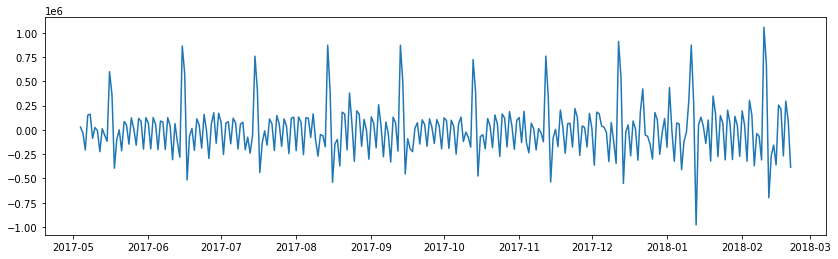

In [35]:
plt.figure(figsize=(14,4))
plt.plot(result2.resid)
plt.show()

In [22]:
currency_trend = result2.trend
currency_trend = currency_trend.dropna()

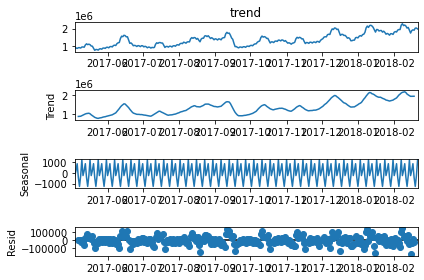

In [28]:
result3 = seasonal_decompose(currency_trend, model='additive')
result3.plot();

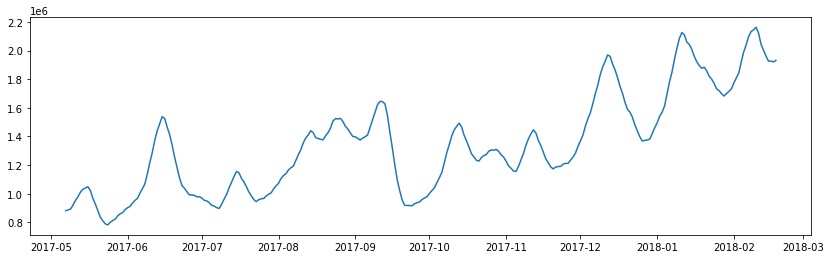

In [44]:
plt.figure(figsize=(14,4))
plt.plot(result3.trend)
plt.show()

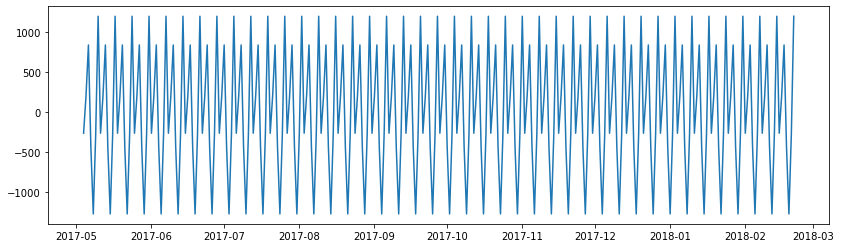

In [45]:
plt.figure(figsize=(14,4))
plt.plot(result3.seasonal)
plt.show()

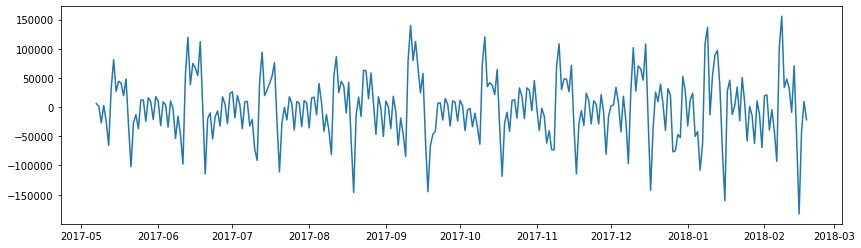

In [29]:
plt.figure(figsize=(14,4))
plt.plot(result3.resid)
plt.show()

## Augmented Dickey-Fuller test (ADF)

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [15]:
sm.tsa.stattools.adfuller(ads.Ads)

(-7.089633890638512,
 4.4448036886224977e-10,
 9,
 206,
 {'1%': -3.4624988216864776,
  '5%': -2.8756749365852587,
  '10%': -2.5743041549627677},
 4210.8045211241315)

In [13]:
p_value = sm.tsa.stattools.adfuller(ads.Ads)[1]
print('Dickey-Fuller: p={0:.5f}'.format(p_value))

Dickey-Fuller: p=0.00000


In [16]:
sm.tsa.stattools.adfuller(currency.GEMS_GEMS_SPENT)

(-1.8160113962891058,
 0.3725419518945776,
 14,
 285,
 {'1%': -3.4535050041524245,
  '5%': -2.8717352599720294,
  '10%': -2.5722024776854417},
 7806.255567542669)

In [14]:
p_value = sm.tsa.stattools.adfuller(currency.GEMS_GEMS_SPENT)[1]
print('Dickey-Fuller: p={0:.5f}'.format(p_value))

Dickey-Fuller: p=0.37254


In [18]:
X = ads.Ads
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.089634
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
Reject Ho - Time Series is Stationary


In [17]:
X = currency.GEMS_GEMS_SPENT
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.816011
p-value: 0.372542
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
Failed to Reject Ho - Time Series is Non-Stationary


In [33]:
# removing trend from the currency data
# newser = currency.GEMS_GEMS_SPENT - result2.trend
newser = currency.GEMS_GEMS_SPENT - result3.trend
newser = newser.dropna()

In [31]:
X = newser
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.231953
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.572
Reject Ho - Time Series is Stationary


## Simple Moving Average

In [34]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [43]:
def plotMovingAverage(series, window):
    """
        series - dataframe with timeseries
        window - rolling window size 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

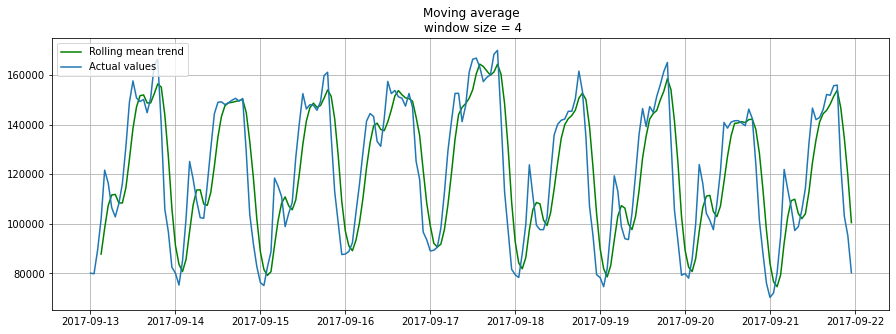

In [44]:
plotMovingAverage(ads, 4)

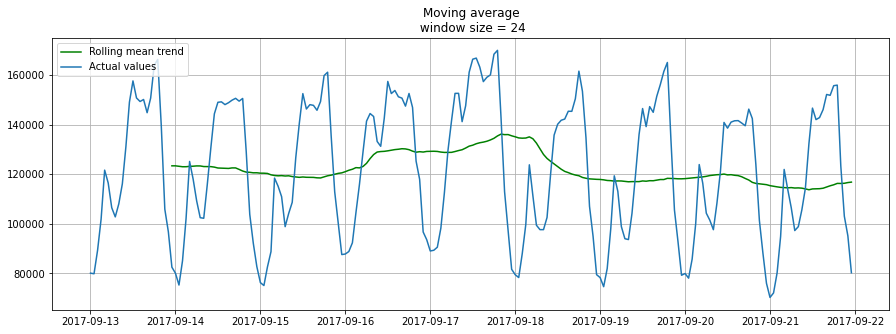

In [45]:
plotMovingAverage(ads, 24)

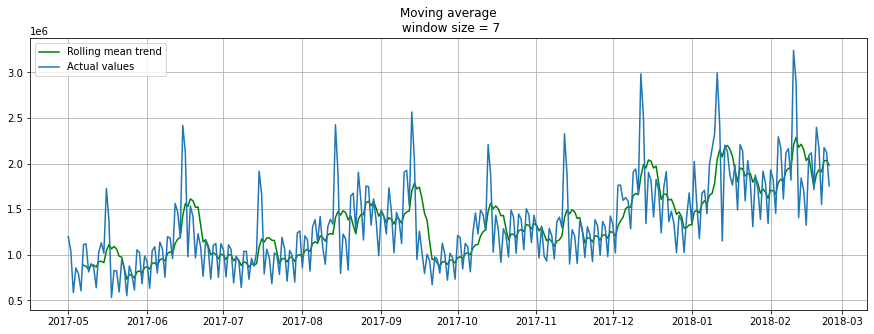

In [47]:
plotMovingAverage(currency, 7)

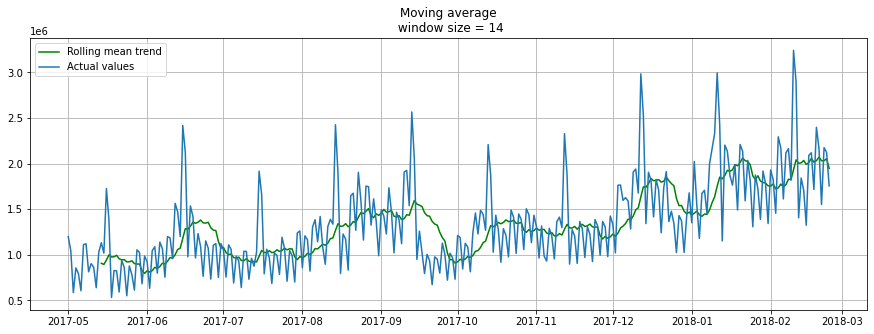

In [49]:
plotMovingAverage(currency, 14)

## Exponential Smoothing

In [50]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [51]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

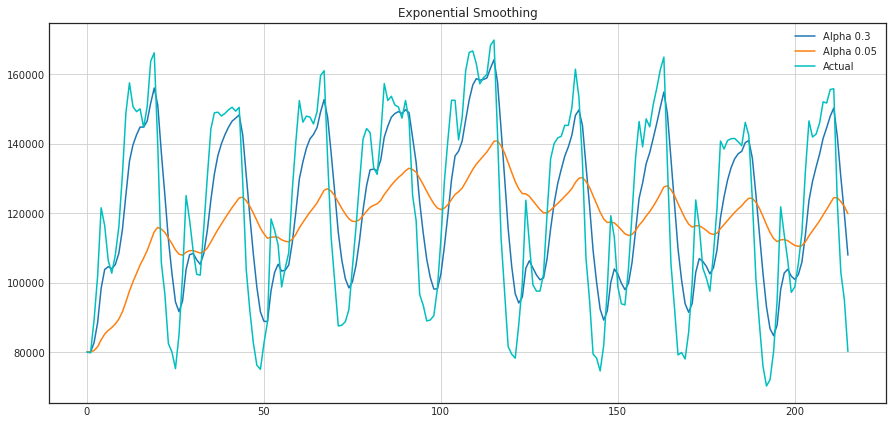

In [52]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

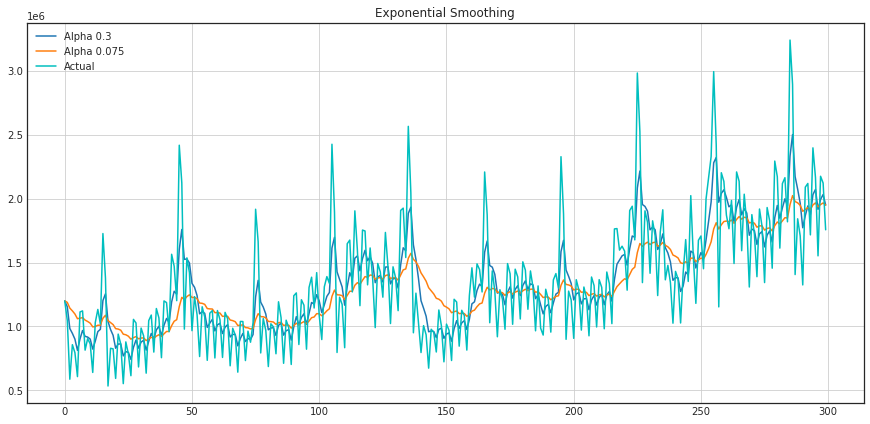

In [54]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3, 0.075])

## Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)

In [4]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

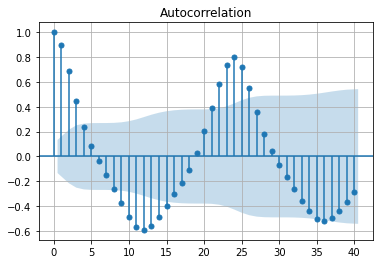

In [24]:
plot_acf(ads.Ads, lags=40);
plt.grid(True)

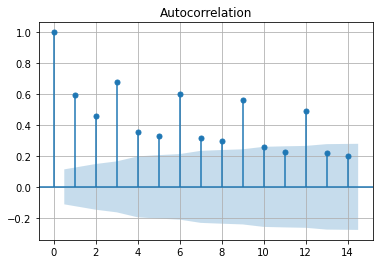

In [25]:
plot_acf(currency.GEMS_GEMS_SPENT, lags=14);
plt.grid(True)

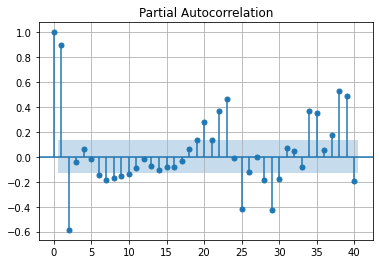

In [26]:
plot_pacf(ads.Ads, lags=40);
plt.grid(True)

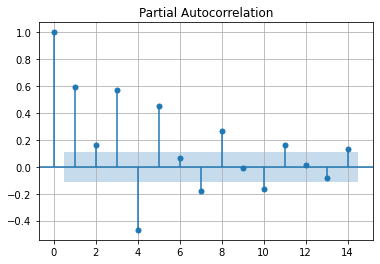

In [27]:
plot_pacf(currency.GEMS_GEMS_SPENT, lags=14);
plt.grid(True)

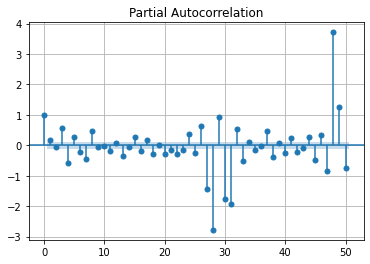

In [17]:
currency_diff = currency.GEMS_GEMS_SPENT - currency.GEMS_GEMS_SPENT.shift(7)
plot_pacf(currency_diff[7:], lags=50);
plt.grid(True)

## ARIMA

In [5]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model = ARIMA(ads.Ads, order=(1,1,1))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Ads   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2281.230
Method:                       css-mle   S.D. of innovations           9803.625
Date:                Tue, 02 Mar 2021   AIC                           4570.460
Time:                        16:50:00   BIC                           4583.942
Sample:                    09-13-2017   HQIC                          4575.907
                         - 09-21-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -19.4899   1385.186     -0.014      0.989   -2734.405    2695.425
ar.L1.D.Ads     0.4258      0.093      4.601      0.000       0.244       0.607
ma.L1.D.Ads     0.1946      0.091      2.129      0.033       0.015       0.374
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3486           +0.0000j            2.3486            0.0000
MA.1           -5.1378           +0.0000j            5.1378            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
pip install pmdarima --user

  Using cached pmdarima-1.8.0-cp38-cp38-win_amd64.whl (616 kB)
  Using cached Cython-0.29.17-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached statsmodels-0.12.2-cp38-none-win_amd64.whl (9.4 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
from pmdarima import auto_arima

In [25]:
stepwise_fit = auto_arima(ads.Ads, trace=True, m=24, start_p=0, d=0, start_q=0, max_p=5, max_d=2, max_q=5)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=4934.934, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=5028.062, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=4482.476, Time=1.16 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=4859.647, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=5684.857, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=4664.942, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=4551.970, Time=3.37 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=4552.743, Time=1.22 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=4587.487, Time=0.29 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=5023.607, Time=0.24 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=4500.745, Time=0.89 sec
 ARIMA(1,0,1)(1,0,0)[24] intercept   : AIC=4451.885, Time=1.53 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=4596.257, Time=0.06 sec
 ARIMA(1,0,1)(2,0,0)[24]

In [26]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  216
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 24)   Log Likelihood               -2220.942
Date:                             Wed, 03 Mar 2021   AIC                           4451.885
Time:                                     09:25:50   BIC                           4468.761
Sample:                                          0   HQIC                          4458.703
                                             - 216                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.01e+04   2352.200      4.293      0.000    5488.552    1.47e+04
ar.L1          0.7075      0.050     14.185      0.000       0.610       0.805
ma.L1          0.2860      0.064      4.471      0.000       0.161       0.411
ar.S.L24       0.7226      0.043     16.800      0.000       0.638       0.807
sigma2      4.568e+07      0.024   1.87e+09      0.000    4.57e+07    4.57e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 8.44
Prob(Q):                              0.40   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.34
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.94e+25. Standard errors may be unstable.
"""

In [35]:
best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(1,1,1), seasonal_order=(1,1,1,24)).fit(disp=-1)
print(best_model.summary())

C:\Users\Gaurab\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurab\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                                Ads   No. Observations:                  216
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -1945.740
Date:                            Wed, 03 Mar 2021   AIC                           3901.479
Time:                                    09:34:28   BIC                           3917.741
Sample:                                09-13-2017   HQIC                          3908.066
                                     - 09-21-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1082      1.532      0.071      0.944      -2.894       3.110
ma.L1         -0.0530      1.521   

In [30]:
## Accuracy metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
d = 1
s = 24 # season length is still 24(hours)

In [31]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

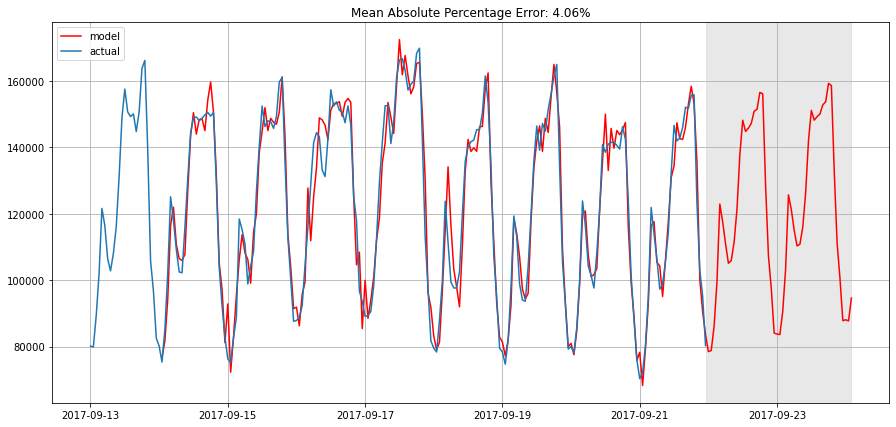

In [40]:
plotSARIMA(ads, best_model, 50)

## Time series based modelling approach

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [69]:
# Creating a copy of the initial dataframe to make various transformations 
data = pd.DataFrame(ads.Ads.copy())
data.columns = ["y"]

In [70]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [71]:
# take a look at the new dataframe 
data.head(10)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 05:00:00,116475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,106495,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 07:00:00,102795,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 08:00:00,108055,89325.0,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)
tscv

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [47]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

In [48]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [49]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [50]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

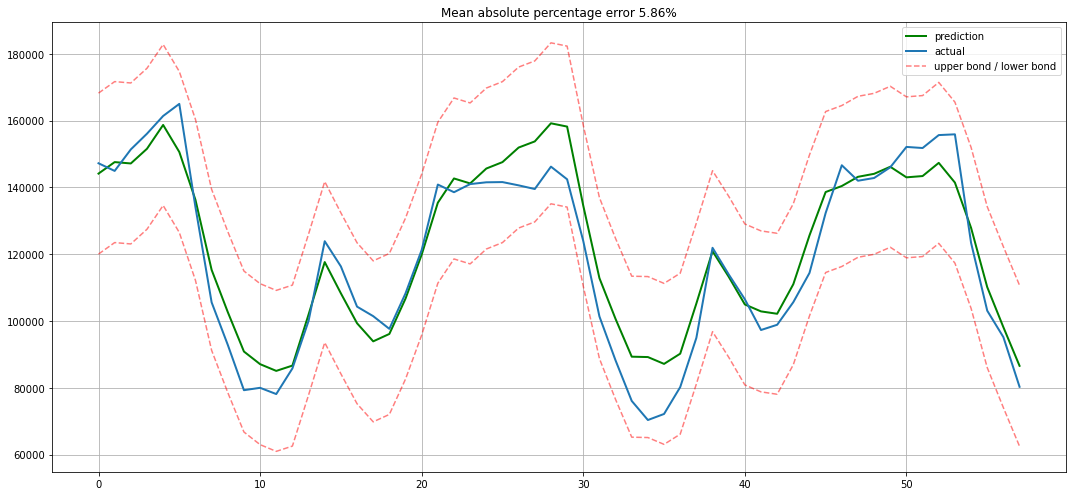

In [52]:
plotModelResults(lr, plot_intervals=True)

In [53]:
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

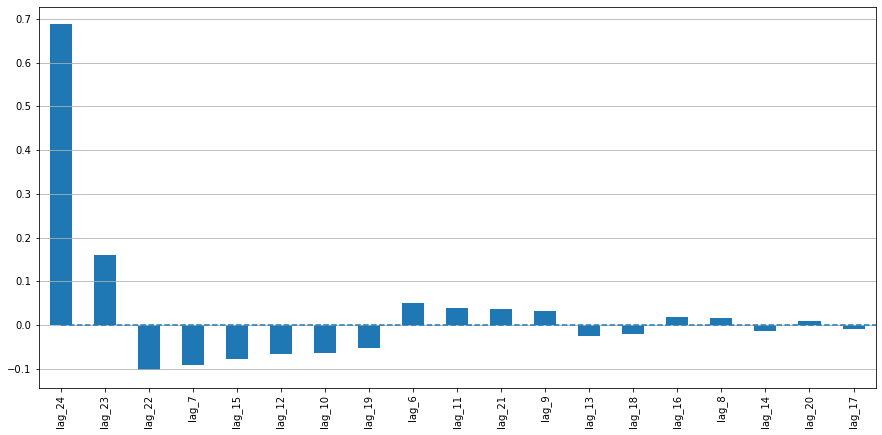

In [54]:
plotCoefficients(lr)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

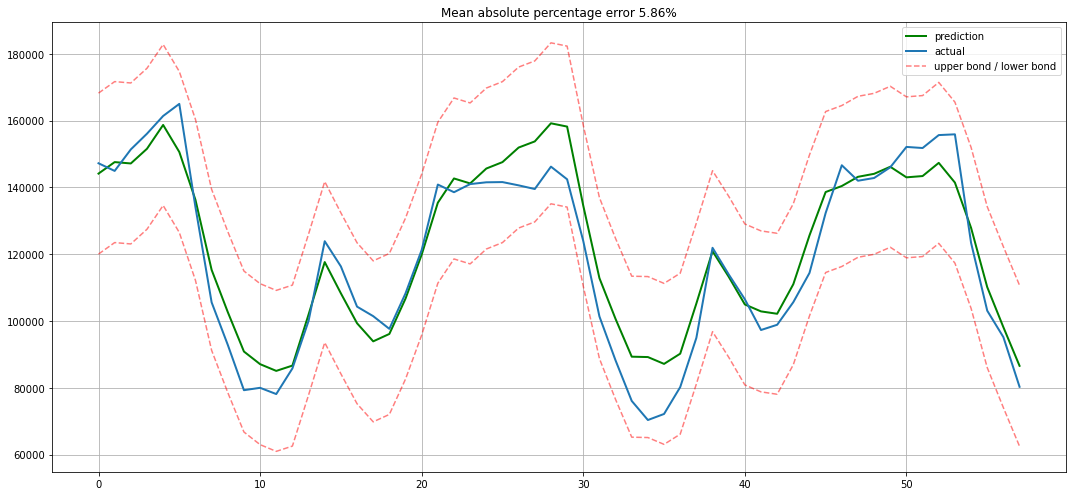

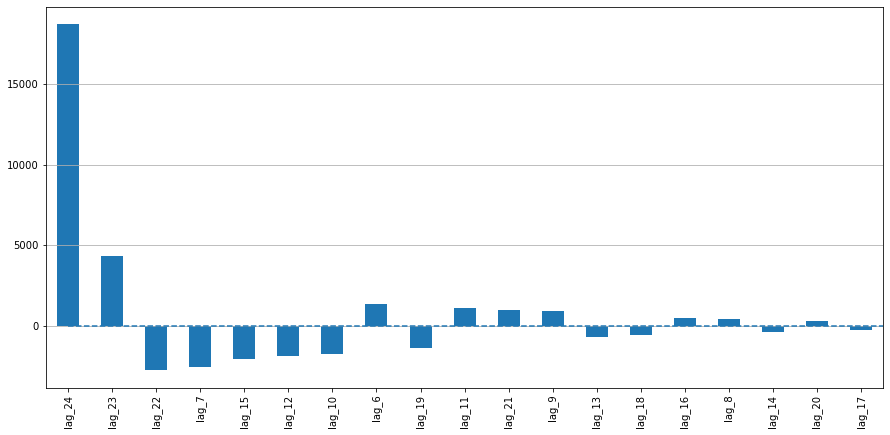

In [72]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [73]:
data.index = pd.to_datetime(data.index)
data["hour"] = data.index.hour    # capturing seasonality
data["weekday"] = data.index.weekday    # capturing trend
data['is_weekend'] = data.weekday.isin([5,6])*1    # capturing seasonal shock
data.tail()

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,hour,weekday,is_weekend
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-21 19:00:00,155890,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,113950.0,...,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0,142425.0,19,3,0
2017-09-21 20:00:00,123395,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,...,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0,20,3,0
2017-09-21 21:00:00,103080,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,...,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,21,3,0
2017-09-21 22:00:00,95155,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,...,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,22,3,0
2017-09-21 23:00:00,80285,151790.0,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,...,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,23,3,0


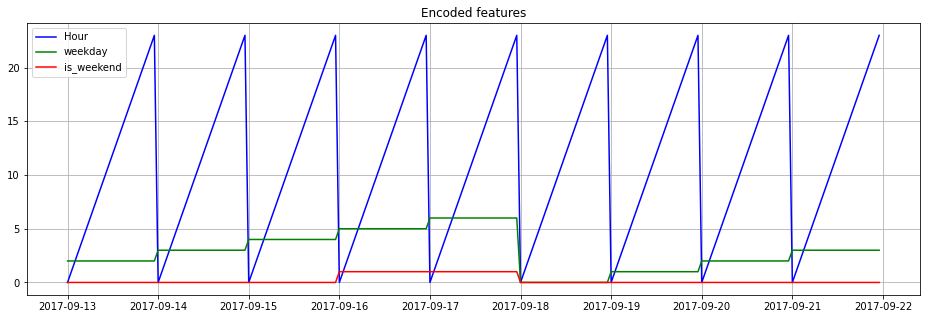

In [61]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
# data.hour.plot()
# data.weekday.plot()
# data.is_weekend.plot()
plt.plot(data.hour, 'b', label="Hour")
plt.plot(data.weekday, 'g', label="weekday")
plt.plot(data.is_weekend, 'r', label="is_weekend")
plt.legend(loc="best")
plt.grid(True);

In [62]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

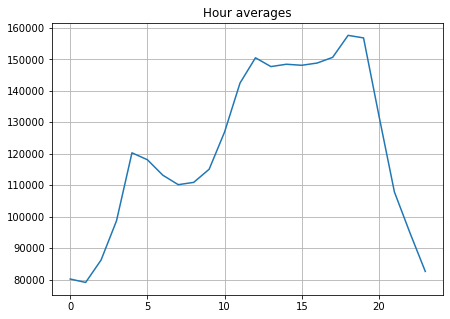

In [63]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

In [64]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

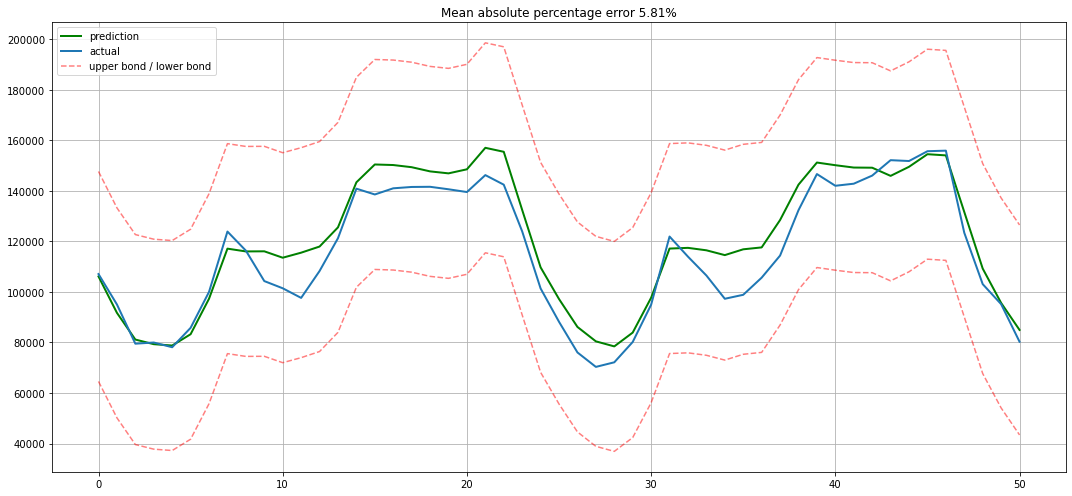

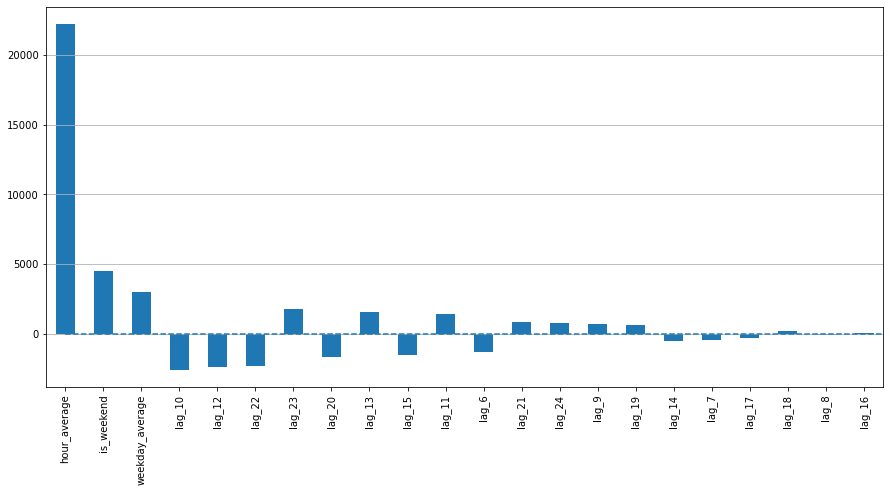

In [76]:
X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=False)
plotCoefficients(lr)

In [77]:
from xgboost import XGBRegressor 

X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

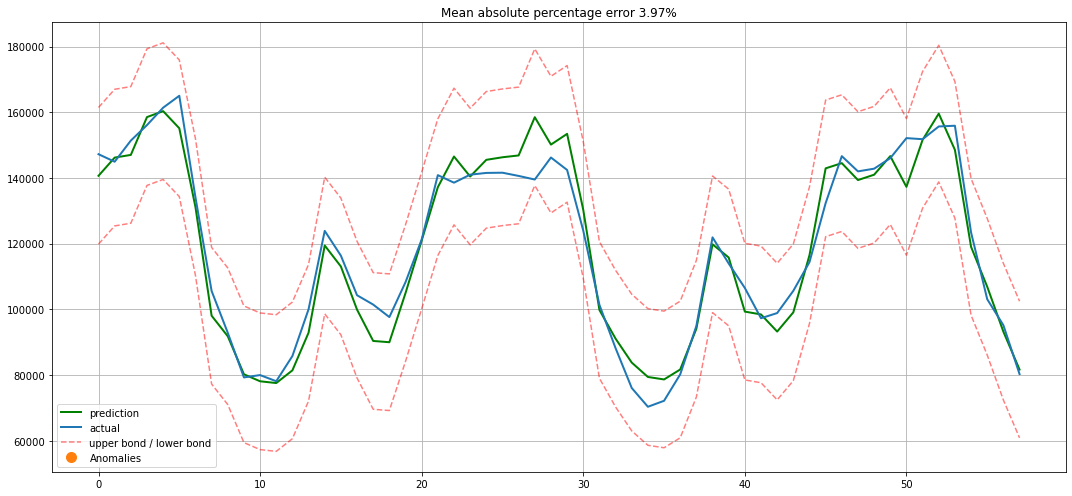

In [78]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [79]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=4, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

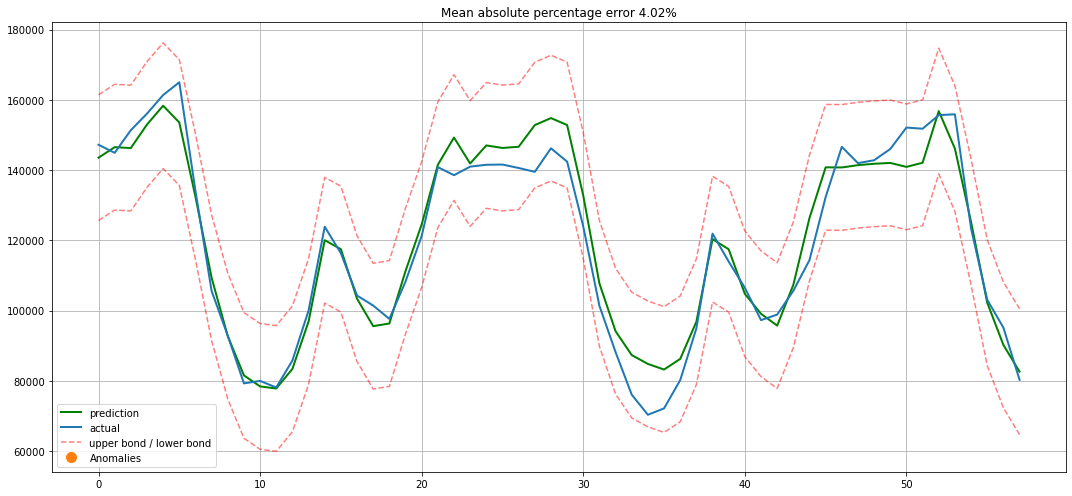

In [80]:
plotModelResults(rf, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)